# GADMA with structure model

By default GADMA is run for the demographic model with structure. Structure defines how detailed the demographic model is and GADMA finds all possible parameters for this model. Here we show how to set structure and use a scheme with increasing structure which provides more stable runs.

In [1]:
#We will need dadi to show plots of our data.
import dadi

## Data

This data was originally built in paper [Portik et al. 2017](https://onlinelibrary.wiley.com/doi/abs/10.1111/mec.14266).

We have two populations of Gaboon forest frog *Scotobleps gabonicus*:

* CVLN
* CVLS

Folded AFS has a size of 30x18. We have `.txt` file with SNP's in SNP's dadi format:

In [2]:
%%bash
# First 1- lines of file
head -10 dadi_2pops_CVLN_CVLS_snps.txt

Ingroup	Outgroup	Allele1	CVLN	CVLS	Allele2	CVLN	CVLS	Gene	Position
-G-	---	G	46	22	A	0	4	1	15
-A-	---	A	45	26	T	1	0	6	15
-C-	---	C	45	24	T	1	0	11	15
-G-	---	G	33	14	T	1	6	12	15
-G-	---	G	44	26	C	2	0	13	15
-A-	---	A	45	20	T	1	0	17	15
-G-	---	G	42	15	A	4	5	22	15
-C-	---	C	45	26	G	1	0	31	15
-G-	---	G	39	24	T	1	0	33	15


## Demographic model

We want to build the demographic model with two time intervals for ancestral population before split and one time interval after split and asymmetric migrations. So our ``Final structure`` should be (2, 1). We could use ``Initial structure`` of (1, 1) and then GADMA will first infer demographic history with (1, 1) structure and then increase it to (2, 1).

## Inference with GADMA

To run GADMA we should set parameters file:

In [1]:
%%bash
cat params_file

# Set data first
Input file: dadi_2pops_CVLN_CVLS_snps.txt
# As we have SNP's file format we need to set the following settings:
Population labels: CVLN, CVLS
Projections: 10, 10  # we downsample AFS for fast example 30, 18 original sizes
Outgroup: False


# Output folder. It should be empty.
Output directory: gadma_result


# Set engine for simulations. We use default moments
Engine: moments
# But we specify grid size for dadi for its usage in generated code
Pts: 30, 40, 50


# Now set structures
Initial structure: 1,1
Final structure: 2,1

# We could specify some additional properties of our model
# We want asymmetric migrations
Symmetric migrations: False
# If True then any population splits into two new in some fraction.
# If False then two new populations after split have its own initial
# sizes. We choose the last option.
Split fractions: False


# No output in stdout
Silence: True

# How many repeats to run and how many processes to use.
Number of repeats: 2
Number of processes:

In [4]:
%%bash
# As output directory should be empty we remove it if it exists
rm -rf gadma_result

Now we could run GADMA:

In [5]:
%%bash
gadma -p params_file

The run was fast because we downsample our AFS data and and use ``moments`` as engine. Also usually one should run a lot of repeats: we have 2 here (50 is better for example).

## Output directory

Now let us look at the output directory. Short descriptions:

* `1` - directory with output of first repeat.
    - `GADMA_GA.log` - log of run.
    - `current_best_logLL_model_moments_code.py` - generated code for the last best by log-likelihood model and ``moments``.
    - `current_best_logLL_model_dadi_code.py` - generated code for the last best by log-likelihood model and ``dadi``.
    - `final_best_logLL_model_moments_code.py` - generated code for the final model and ``moments``.
    - `final_best_logLL_model_dadi_code.py` - generated code for the final model and ``dadi``.
    - `eval_file` - File with all evaluations.
    - `save_file_1_1` - File with saved info about run for (1,1) structure.
    - `save_file_2_1` - File with saved info about run for (2,1) structure.
* `2` - directory with output of second repeat.
* `GADMA.log` - the output of base run.
* `best_logLL_model_moments_code.py` - result best model code for ``moments``.
* `best_logLL_model_dadi_code.py` - result best model code for ``dadi``.
* `best_logLL_model.png` - picture of best model.
* `params_file` - settings of the base run.
* `extra_params_file` - extra settings of the base run.

In [6]:
%%bash
tree gadma_result
# If you do not have tree:
# ls gadma_result

gadma_result
├── 1
│   ├── current_best_logLL_model_dadi_code.py
│   ├── current_best_logLL_model_moments_code.py
│   ├── eval_file
│   ├── final_best_logLL_model_dadi_code.py
│   ├── final_best_logLL_model_moments_code.py
│   ├── final_best_logLL_model.png
│   ├── GADMA_GA.log
│   ├── save_file
│   ├── save_file_1_1
│   └── save_file_2_1
├── 2
│   ├── current_best_logLL_model_dadi_code.py
│   ├── current_best_logLL_model_moments_code.py
│   ├── eval_file
│   ├── final_best_logLL_model_dadi_code.py
│   ├── final_best_logLL_model_moments_code.py
│   ├── final_best_logLL_model.png
│   ├── GADMA_GA.log
│   ├── save_file
│   ├── save_file_1_1
│   └── save_file_2_1
├── best_logLL_model_dadi_code.py
├── best_logLL_model_moments_code.py
├── best_logLL_model.png
├── extra_params_file
├── GADMA.log
└── params_file

2 directories, 26 files


In [7]:
%%bash
# GADMA.log contains the same output we have during run. Let us see last lines again:
tail -n 20 gadma_result/GADMA.log

Finish genetic algorithm number 2

[001:03:13]
All best by log-likelihood models
Number	log-likelihood	Model
Run 2	-157.72	[ [ 0.104(t1), [0.684(nu11)], [Lin(dyn11)] ],	[ 1 pop split  [0.027(nu11_1), 0.425(nu11_2)] ],	[ 1.0(t2), [6.008(nu21), 1.305(nu22)], [[0, 0.00e+00(m2_12)], [1.184(m2_21), 0]], [Lin(dyn21), Exp(dyn22)] ] ]	m	(theta =  417.82)
Run 1	-157.82	[ [ 0.465(t1), [1.0(nu11)], [Sud(dyn11)] ],	[ 1 pop split  [0.027(nu11_1), 0.448(nu11_2)] ],	[ 1.027(t2), [6.156(nu21), 1.317(nu22)], [[0, 0(m2_12)], [1.156(m2_21), 0]], [Lin(dyn21), Exp(dyn22)] ] ]	(theta =  407.99)

You can find picture and python code of best model in the output directory.


--Finish pipeline--


You didn't specify theta at the beginning. If you want change it and rescale parameters, please see tutorial.

Thank you for using GADMA!

In case of any questions or problems, please contact: ekaterina.e.noskova@gmail.com



### Plots

File best_logLL_model.png have picture of our best model:


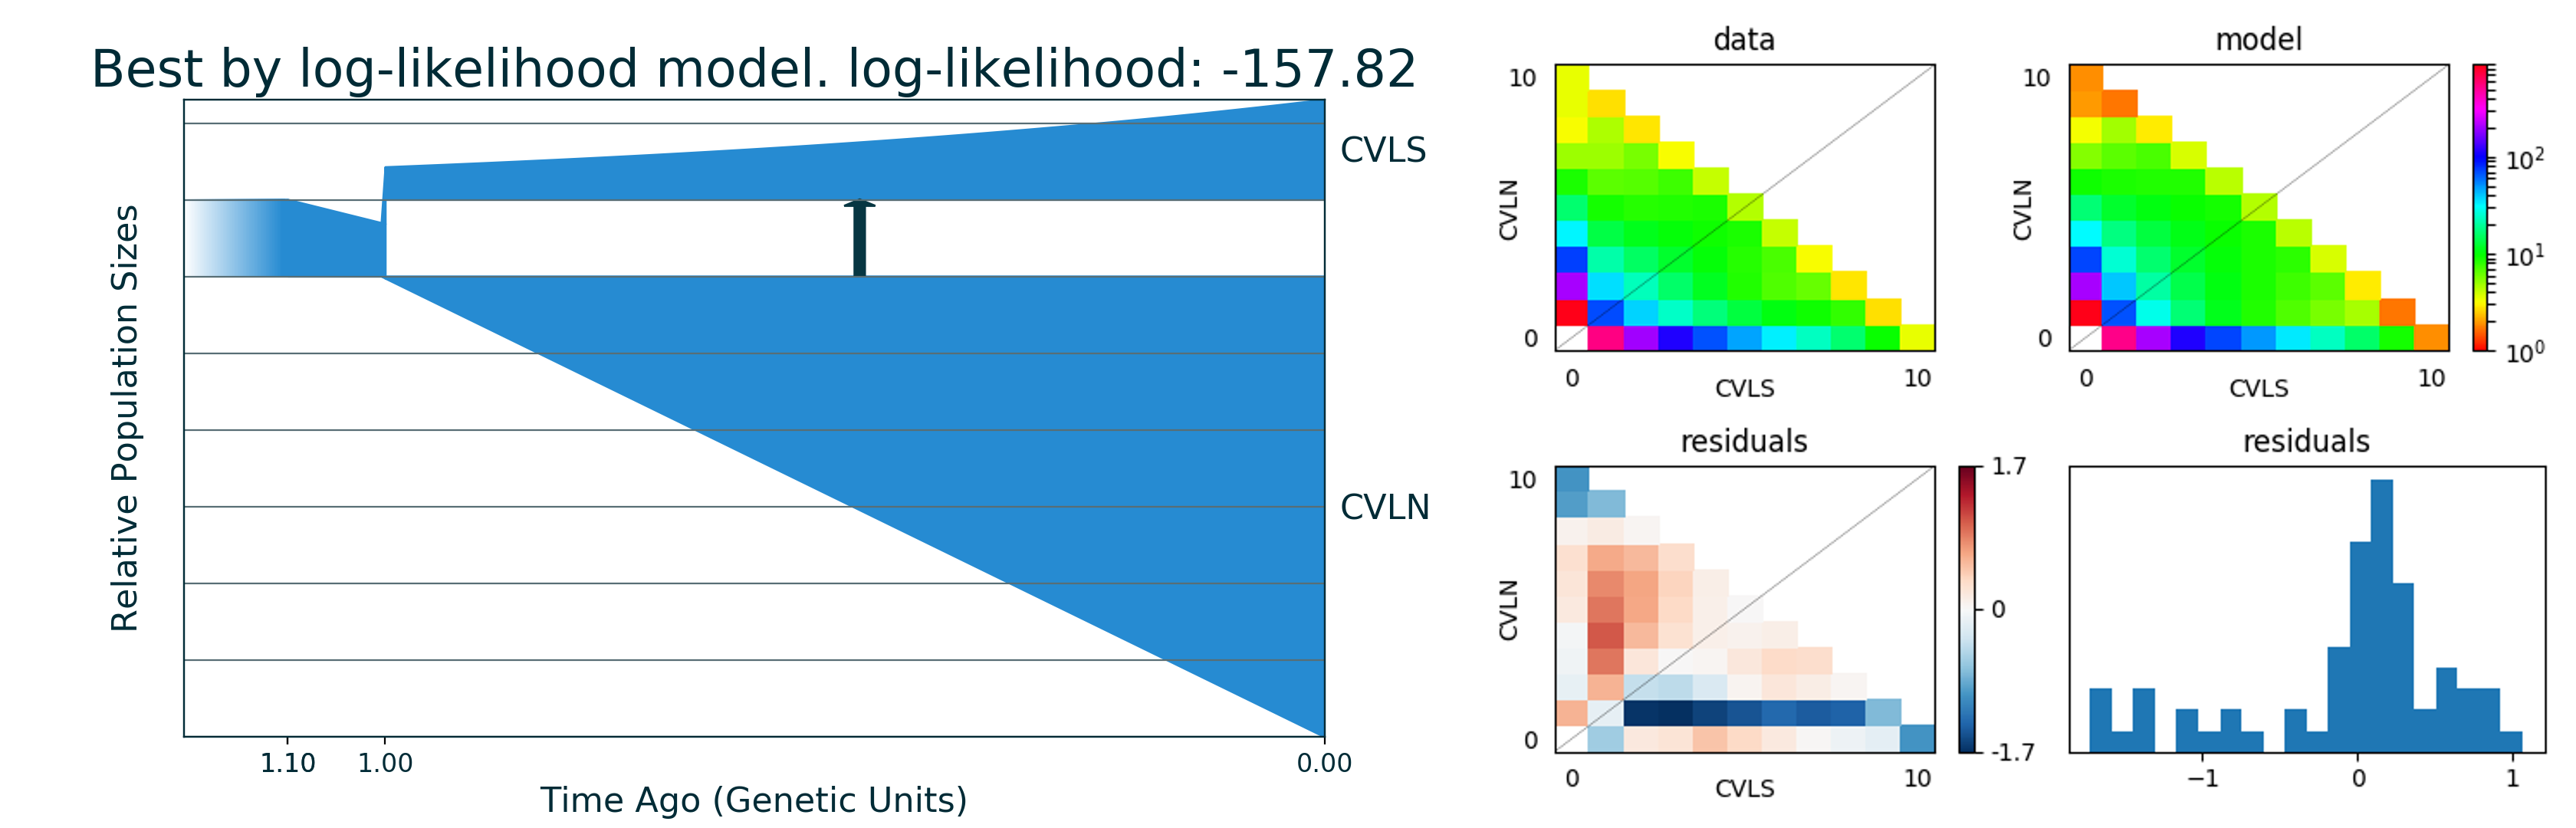

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 

Image("gadma_result/best_logLL_model.png")

### Run generated code with final model

We could run the code of the final model to get its log-likelihood. In case of the demographic model with structure, GADMA generates code both for ``dadi`` and ``moments``. We used ``moments`` so let is rerun code of final model:

In [2]:
%%bash
# Show generated code
cat gadma_result/best_logLL_model_moments_code.py

import moments
import numpy as np

def model_func(params, ns):
	t1, nu11, nu11_1, nu11_2, t2, nu21, nu22, m2_12, m2_21 = params
	sts = moments.LinearSystem_1D.steady_state_1D(np.sum(ns))
	fs = moments.Spectrum(sts)
	nu1_func = lambda t: 1.0 + (nu11 - 1.0) * (t / t1)
	fs.integrate(tf=t1, Npop=lambda t: [nu1_func(t)], dt_fac=0.01)
	fs = moments.Manips.split_1D_to_2D(fs, ns[0], ns[1])
	nu1_func = lambda t: nu11_1 + (nu21 - nu11_1) * (t / t2)
	nu2_func = lambda t: nu11_2 * (nu22 / nu11_2) ** (t / t2)
	migs = np.array([[0, m2_12], [m2_21, 0]])
	fs.integrate(tf=t2, Npop=lambda t: [nu1_func(t), nu2_func(t)], m=migs, dt_fac=0.01)
	return fs

dd = moments.Misc.make_data_dict('dadi_2pops_CVLN_CVLS_snps.txt')
data = moments.Spectrum.from_data_dict(dd, ['CVLN', 'CVLS'], [10, 10], polarized=False)
ns = data.sample_sizes

p0 = [0.10376664756510699, 0.6842060211009087, 0.026658306623565005, 0.4253055557299519, 1.0003743981743454, 6.008416210104161, 1.305377168258428, 0.0, 1.1843358227264176]
model = 

In [9]:
%%bash
# Run generated code
python3 gadma_result/best_logLL_model_moments_code.py

Model log likelihood (LL(model, data)): -157.723240897732
Optimal value of theta: 417.8151649912695


/usr/local/lib/python3.6/dist-packages/moments-1.0.6-py3.6-linux-x86_64.egg/moments/Spectrum_mod.py:1362: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  slices[pop_ii]


After run of generated code new plot of model is saved to `model_from_GADMA.png`:

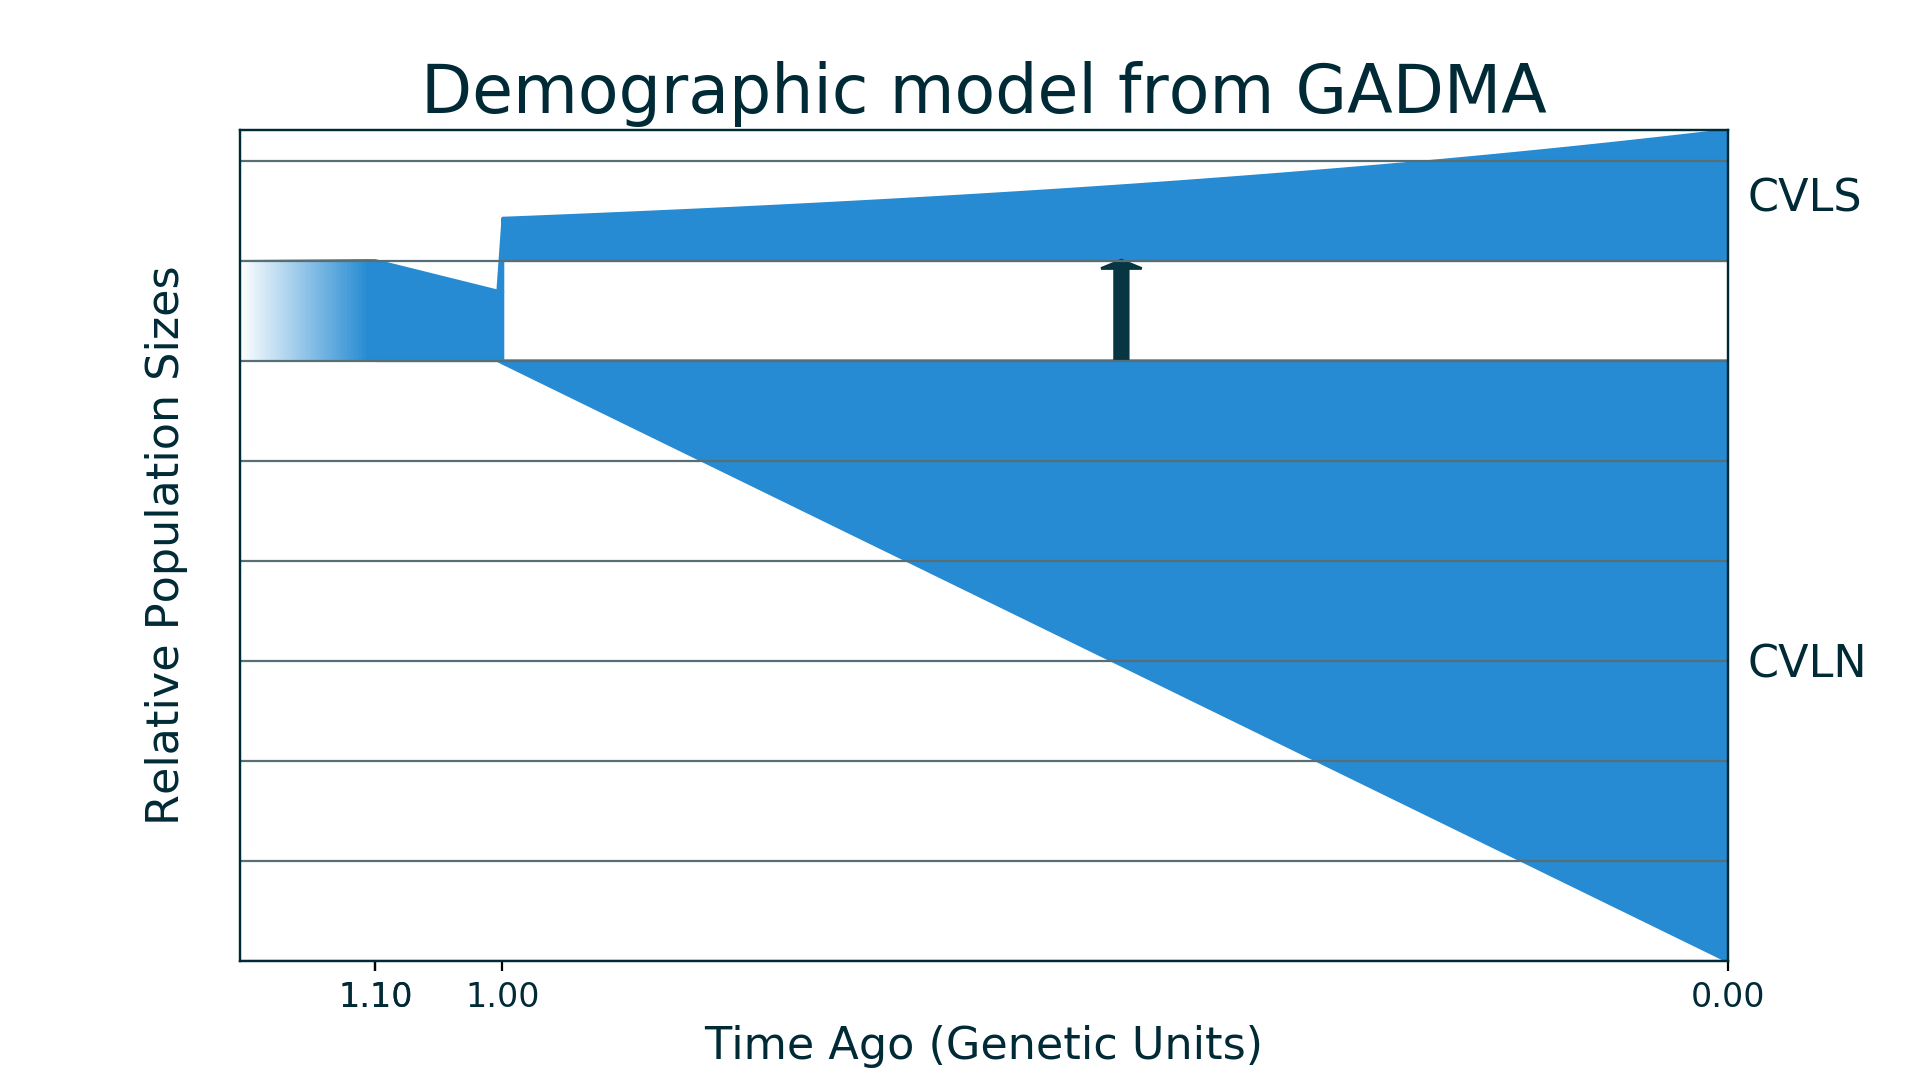

In [13]:
Image("model_from_GADMA.png")

And now we could run generated code for ``dadi``, model is the same but as it is another engine value of log-likelihood will be different.

In [3]:
%%bash
# Show generated code
cat gadma_result/best_logLL_model_dadi_code.py

import dadi
import numpy as np

def model_func(params, ns, pts):
	t1, nu11, nu11_1, nu11_2, t2, nu21, nu22, m2_12, m2_21 = params
	xx = dadi.Numerics.default_grid(pts)
	phi = dadi.PhiManip.phi_1D(xx)
	nu1_func = lambda t: 1.0 + (nu11 - 1.0) * (t / t1)
	phi = dadi.Integration.one_pop(phi, xx, T=t1, nu=nu1_func)
	phi = dadi.PhiManip.phi_1D_to_2D(xx, phi)
	nu1_func = lambda t: nu11_1 + (nu21 - nu11_1) * (t / t2)
	nu2_func = lambda t: nu11_2 * (nu22 / nu11_2) ** (t / t2)
	phi = dadi.Integration.two_pops(phi, xx, T=t2, nu1=nu1_func, nu2=nu2_func, m12=m2_12, m21=m2_21)
	sfs = dadi.Spectrum.from_phi(phi, ns, [xx]*len(ns))
	return sfs

dd = dadi.Misc.make_data_dict('dadi_2pops_CVLN_CVLS_snps.txt')
data = dadi.Spectrum.from_data_dict(dd, ['CVLN', 'CVLS'], [10, 10], polarized=False)
pts = [30, 40, 50]
ns = data.sample_sizes

p0 = [0.10376664756510699, 0.6842060211009087, 0.026658306623565005, 0.4253055557299519, 1.0003743981743454, 6.008416210104161, 1.305377168258428, 0.0, 1.1843358227264176]
f

In [11]:
%%bash
# Run generated code
python3 gadma_result/best_logLL_model_dadi_code.py

Model log likelihood (LL(model, data)): -159.2142532384653
Optimal value of theta: 419.8896797928062
